<a href="https://colab.research.google.com/github/ashfarhangi/Massive_Storage_and_Big_Data/blob/master/code/3_Spark_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Topics:
- MapReduce in Spark
- Hands-on Live Practice

In [ ]:
import os
import sys
!pip install pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, SparkSession
!wget https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar -xvf /content/spark-3.0.1-bin-hadoop2.7.tgz
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
# Start a Spark Session
spark = SparkSession \
    .builder \
    .getOrCreate()
words = ["Hello", "Spark", "is currently",'running','!']
sc.parallelize(words).count()

--2020-09-21 21:28:01--  https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 2a01:4f8:10a:201a::2
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 219929956 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.1-bin-hadoop2.7.tgz.2’

z.2                  92%[=================>  ] 193.45M  27.4MB/s    eta 1s     

## MapReduce in Spark

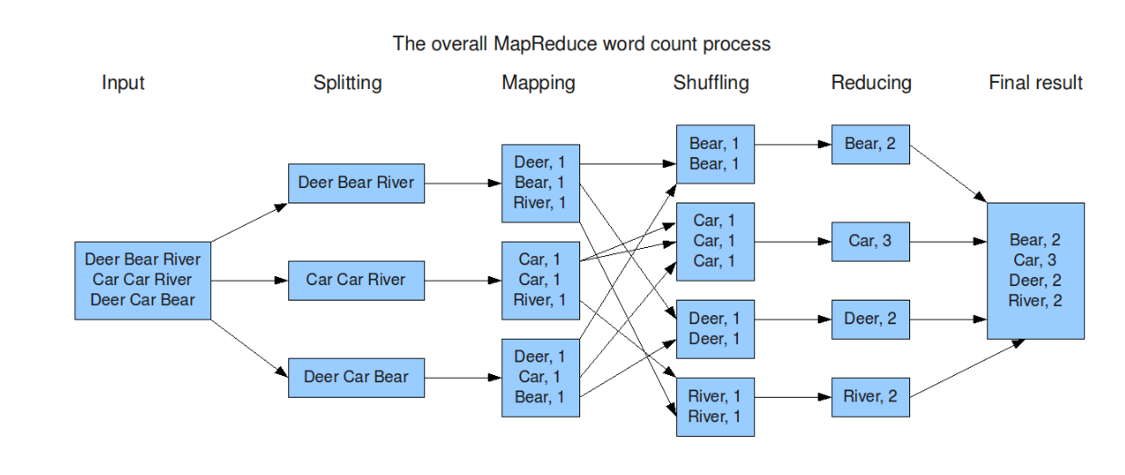

In [ ]:
# import re
# def get_words(line):
#     return re.compile('\w+').findall(line)

In [ ]:
#Upload your test.txt here
!wget -nc -q https://raw.githubusercontent.com/ashfarhangi/Reinforcement-Learning-Trading/master/review.txt

In [ ]:
def Func(lines):
      lines = lines.lower()
      return lines

#read test file, split into different lines for analyzation
#change test file
lines1 = sc.textFile("review.txt").flatMap(lambda line: line.split(" "))

#apply function to make lowercase
fixed_line = lines1.map(Func)
reduce = fixed_line.reduce
#Read user input, make lower case
WordIn = input("Word: ").lower()

#count instance of word in each line
CountFind = fixed_line.filter(lambda line: WordIn in line).count()

#print result, which is case insensitive
print(CountFind)


In [ ]:
lines1.collect()
fixed_line.collect()

# Hands-on Live 

## Practice I:


In [ ]:
!wget -nc -q https://raw.githubusercontent.com/ashfarhangi/Reinforcement-Learning-Trading/master/review.txt

In [ ]:
import pyspark.sql.functions as f
# from pyspark.sql import SQLContext
# sqlContext = SQLContext(sc)


In [ ]:
# sqlContext = SQLContext(sc)
#read it meta and review text files

dfdata = spark.read.json('review.txt')
dfdata.show()

In [ ]:
#add the number of words of each row into a new column
filterDFdata_word = dfdata.withColumn('wordCount', f.size(f.split(f.col('reviewText'), ' ')))

#filter by the number of words greater or equal to 100, order by overall rating
filterDFdata = filterDFdata_word.filter(filterDFdata_word.wordCount > "100").orderBy("overall")

#print and save output to file
filterDFdata.write.csv("/content/overview_output_0.csv")
filterDFdata.coalesce(1).write.csv("/content/overview_output_1.csv")



## Practice II:

In [ ]:
!wget -nc -q https://raw.githubusercontent.com/ashfarhangi/Reinforcement-Learning-Trading/master/meta.txt


In [ ]:
dfmeta = spark.read.json('meta.txt')
dfmeta.show()

In [ ]:
#filter by music category
filterDFmeta = dfmeta.filter(dfmeta.categories == "Music")

#match the filtered music category to asin numbers to get review size
diff_data = filterDFmeta.join(dfdata,filterDFmeta["asin"] == dfdata["asin"],"left")

#add a col with the number of words in the review
wordcnt = diff_data.withColumn('wordCount', f.size(f.split(f.col('reviewText'), ' ')))

#count the number of rows to devide from the total number of words in all reviews
x = diff_data.count()   

#Count total number of words in the columns
Sumcol = wordcnt.agg(f.sum("wordCount")).collect()[0][0]

#take the total number of words and devide by the number of rows
Average_word = Sumcol / x

#Total Average
print(Average_word)

## Practice II:



In [ ]:
!wget -nc -q https://raw.githubusercontent.com/ashfarhangi/Massive_Storage_and_Big_Data/master/data/tesla.csv

In [ ]:
df = spark.read.csv('tesla.csv',header=True,inferSchema=True)
df.columns

In [ ]:
df.printSchema()

In [ ]:
df.head(5)

In [ ]:
df.describe().show()

In [ ]:
from pyspark.sql.functions import format_number
from pyspark.sql.functions import mean,max,min,count


In [ ]:
result = df.describe()
result.select(result['summary'],
              format_number(result['Open'].cast('float'),2).alias('Open'),
              format_number(result['High'].cast('float'),2).alias('High'),
              format_number(result['Low'].cast('float'),2).alias('Low'),
              format_number(result['Close'].cast('float'),2).alias('Close'),
              result['Volume'].cast('int').alias('Volume')
             ).show()

In [ ]:
# What day had the Peak High in Price?
df.orderBy(df["High"].desc()).head(1)[0][0]

In [ ]:
df.select(mean("Close")).show()

In [ ]:
df.select(max("Volume"),min("Volume")).show()

In [ ]:
df.filter("Close < 90").count()

In [ ]:
result = df.filter(df['Close'] < 60)
result.select(count('Close')).show()

In [ ]:
#Percentage of stock price over 80$ over the course of years
(df.filter(df["High"]>80).count()*1.0/df.count())*100

- Max High per year

In [ ]:
from pyspark.sql.functions import year
yeardf = df.withColumn("Year",year(df["Date"]))
max_df = yeardf.groupBy('Year').max()
max_df.select('Year','max(High)').show()

- What is the average Close for each Calendar Month?


In [ ]:
from pyspark.sql.functions import month
monthdf = df.withColumn("Month",month("Date"))
monthavgs = monthdf.select("Month","Close").groupBy("Month").mean()
monthavgs.select("Month","avg(Close)").orderBy('Month').show()

## Take home exercise:

- What is the most expensive item in the "dfmeta" data?
- Show the number of each category by desending order

In [ ]:
dfdata.show()